In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd

In [40]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS/LAB EVAL 3/test.csv')

In [41]:
test.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS/LAB EVAL 3/test.csv')

In [42]:
test

,Unnamed: 0,Unnamed: 0.1,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,0,120,284,27,62,100,False
1,1,1,113,282,33,64,135,False
2,2,2,128,279,28,64,115,True
3,3,3,108,282,23,67,125,True
4,4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...,...
1169,1169,1169,113,275,27,60,100,False
1170,1170,1170,128,265,24,67,120,False
1171,1171,1171,130,291,30,65,150,True
1172,1172,1172,125,281,21,65,110,False


In [43]:
smoking_and_birthweight = test[['Maternal Smoker', 'Birth Weight']]
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [44]:
smoking_and_birthweight['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [45]:
smoker = smoking_and_birthweight['Birth Weight'] [smoking_and_birthweight['Maternal Smoker'] == True]
smoker

2       128
3       108
8       143
10      144
11      141
       ... 
1162    143
1163    113
1164    109
1165    103
1171    130
Name: Birth Weight, Length: 459, dtype: int64

In [46]:
non_smoker = smoking_and_birthweight['Birth Weight'] [smoking_and_birthweight['Maternal Smoker'] == False]
non_smoker

0       120
1       113
4       136
5       138
6       132
       ... 
1168    132
1169    113
1170    128
1172    125
1173    117
Name: Birth Weight, Length: 715, dtype: int64

#1. Draw the histograms of the two distributions in the sample(2), and state your inferences(1)

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f233f665e50>,
      dtype=object)

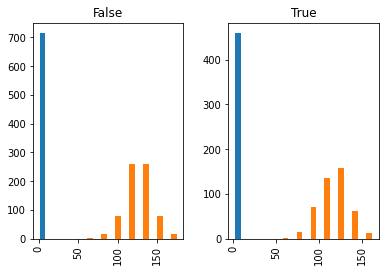

In [48]:
smoking_and_birthweight.hist(by ='Maternal Smoker')

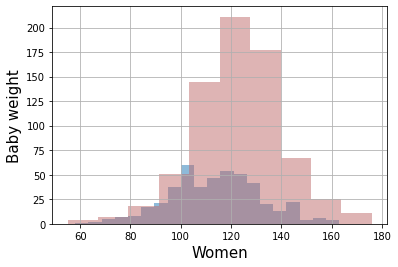

In [49]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Baby weight',fontsize=15)
plt.show()

In [50]:
#The distribution of the weights of the babies born to mothers who smoked appears to be shifted slightly to the left of the distribution corresponding to non-smoking mothers. 
#The weights of the babies of the mothers who smoked seem lower, on average than the weights of the babies of the non-smokers.

# 2. Which statistical test would you employ?(2)

In [51]:
#the statistical test that is suitable for this case study is AB testing
#In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B.

# 3. State the Null and Alternative Hypothesis (1)

# Null Hypothesis 

In [52]:
# In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.


# Alternative Hypothesis 

In [53]:
# In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers

# 4. What statistic do you recommend to apply for this case(2)?

In [54]:
#The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

#We will do the subtraction in the order "average weight of the smoking group - average weight of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis

# 5. State the observed statistic.(2)

In [55]:
#The observed value of the test statistic is about -9.3 ounces. means_table = smoking_and_birthweight.group('Maternal Smoker',np.average) means_table

In [56]:
means_table = smoking_and_birthweight.groupby('Maternal Smoker').mean()
type(means_table)

pandas.core.frame.DataFrame

In [57]:
means_table

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [58]:
observed_difference = means_table['Birth Weight'][1] - means_table['Birth Weight'][0]

In [59]:
observed_difference


-9.266142572024918

# 6. Simulate the test statistic under the Null that will help make the decision.(3)

# Random permutation.

In [60]:
#If there were no difference between the two distributions in the underlying population, then whether a birth weight has the label True or False with respect to maternal smoking should make no difference to the average. The idea, then, is to shuffle all the birth weights randomly among the mothers. This is called random permutation.

#Take the difference of the two new group means: the mean of the shuffled weights assigned to the smokers and the mean of the shuffled weights assigned to the non-smokers. This is a simulated value of the test statistic under the null hypothesis.

In [61]:
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [62]:
shuffled = smoking_and_birthweight.sample(1174,replace = False)
shuffled

,Maternal Smoker,Birth Weight
329,True,140
373,False,120
760,False,117
806,False,126
280,False,111
...,...,...
1160,True,124
697,True,125
1073,False,100
705,False,127


In [63]:
shuffled_weights = shuffled['Birth Weight']
type(shuffled_weights)

pandas.core.series.Series

In [64]:
original_and_shuffled= smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )

In [65]:
original_and_shuffled

,Maternal Smoker,Birth Weight,shuffled_weights
0,False,120,140
1,False,113,120
2,True,128,117
3,True,108,126
4,False,136,111
...,...,...,...
1169,False,113,124
1170,False,128,125
1171,True,130,100
1172,False,125,127


In [66]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Birth Weight,shuffled_weights
Maternal Smoker,,
False,123.085315,119.230769
True,113.819172,119.823529


In [67]:
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

-0.5927601809954837

In [68]:
smoking_and_birthweight = test[['Maternal Smoker', 'Birth Weight']]
shuffled = smoking_and_birthweight.sample(1174,replace = False)
shuffled_weights = shuffled['Birth Weight']
original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

2.3048128342245917

In [69]:
import numpy as np
import array
differences = np.zeros(5000)

In [70]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4995,0.0
4996,0.0
4997,0.0
4998,0.0


# 7. Draw a histogram to depict what the model of random selection predicts about the statistic.(3)

Observed Difference: -9.266142572024918


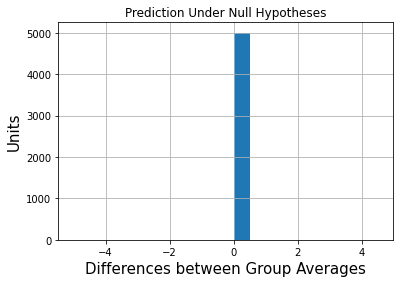

In [71]:
differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

Notice how the distribution is centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about -9.27 ounces, which doesn't even appear on the horizontal scale of the histogram. The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.

# 8. Evaluate the empirical p-value of the test?(3)

to compute an empirical P-value, remember that low values of the statistic favor the alternative hypothesis.

In [72]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.0

The empirical P-value is 0, meaning that none of the 5,000 observed samples resulted in a difference of -9.27 or lower. This is an approximation; the exact chance of getting a difference in that range is not 0 but it is vanishingly small.

# 9. What is the outcome of your analysis? (1)

The conclusion of the test is that the data support the alternative more than they support the null. The average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers.